1. Нахождение сложной производной.
Найдите производную по x от функции:
$$sin\left(tan(x)\frac{x^2}{y} +ln(e^{-x^2+3} + x^3y)\right)tan(x^2e^{x^9})$$

При этом надо пользоваться встроенным в PyTorch autograd.

я подразумеваю? что всетаки у нас х  - число, а не массив. если нет то тогда надо переделывать в операции над массивами.

умноржение torch.matmul
деление - умножение на torch.inverse
степень - torch.matrix_power

In [1]:

def find_x_derivative(x, y):
   f = torch.sin(torch.tan(x)*x*x/y + torch.log(torch.exp(-x**2 + 3) + y*x**3))*torch.tan(x*x * torch.exp(x**9))
   c = f.sum()
   c.backward()
   return x.grad

In [2]:
import torch

x = [1.1] # из за последнего члена нельзя брать больше 1.5 так как будет чудовещно большое число, которое приведет к nan
y = [5.]
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)

In [3]:
find_x_derivative(x,y)

tensor([35.9334])

Вам даны две матрицы A и B. Необходимо посчитать косинусную близость между строчками матрицы A и столбцами матрицы B. Ответ - матрица чисел, где номер строки - номер строки из матрицы А, а номер столбца - номер столбца из В, от которых бралась косинусная близость.
Напомним, что косинусная близость двух векторов - косинус угла между ними. В n-мерном пространстве косинус угла между векторами удобнее всего через скалярное произведение:
$$cos(angle(x,y)) = \frac{x \cdot y}{\| x\|\| y\|}$$

(Наша операция очень похожа на умножение матриц)
(Выполнять задание следует по представленной формуле)

In [4]:
def get_cos_sim(A, B):
   """
       A, B - torch float tensors
   """
   # YOUR CODE HERE
  
   return # YOUR CODE HERE

In [5]:
a = [[1., 2.],
    [2., 3.]]
b = [[1., 3., 5.],
    [4., 1., 3.]]


A = torch.tensor(a, requires_grad=True)
B = torch.tensor(b, requires_grad=True)


In [6]:
def norm(x):
    return torch.sqrt((x * x).sum())

def get_cos_sim(A, B):
    if (B.dim() > 1) and A.shape[1] == B.shape[0]:
        C = A.matmul(B)
        for row in range(A.shape[0]):
            for column in range(B.shape[1]):
                C[row, column] /=  norm(A[row]) * norm(B[:, column])
        return C
    print('A, B - have wrong dims, A.shape[1] have to be equal B.shape[0]')


In [7]:
get_cos_sim(A, B)

tensor([[0.9762, 0.7071, 0.8437],
        [0.9417, 0.7894, 0.9037]], grad_fn=<CopySlices>)

In [8]:
a = [[1., 2.,3.],
    [2., 3., 3.]]
b = [[1., 3., 5.],
    [4., 1., 3.]]


A = torch.tensor(a, requires_grad=True)
B = torch.tensor(b, requires_grad=True)

get_cos_sim(A, B)

A, B - have wrong dims, A.shape[1] have to be equal B.shape[0]


    3. Обучение своей нейронной сети

Взять датасет Fashion-Mnist, построить свою нейронную сеть cо сверточными слоями и обучить эту нейронную сеть пользуясь материалами из вебинара. 

Архитектура нейронной сети должна быть следующая:

1. Сначала должны идти два блока в которых должны присутствовать следующие слои:
- два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
- И в конце каждого блока слой макс пулинга
2. в конце должны идти 3 линейных слоя.
При этом можете поиграться с разными оптимизаторами.
В качестве результата прошу приложить скрин с картинками и предсказанными классами.

In [9]:
import torchvision
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [10]:
train_dataset = torchvision.datasets.FashionMNIST(root='../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [12]:
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [14]:
classes = ['T-shirt/top', 'Trousser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1_1 = nn.Conv2d(1, 128, 5, padding=2)
        self.conv1_2 = nn.Conv2d(128, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2_1 = nn.Conv2d(64, 32, 5, padding=2)
        self.conv2_2 = nn.Conv2d(32, 16, 3, padding=1)
        self.fc1 = nn.Linear(16 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool(x)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

for epoch in range(10):
    print(f'New №{epoch} epoch started!')
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs.cuda())
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

#### Сохранение модели

PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

#### Загрузка и использование модели 

net = Net()
net.load_state_dict(torch.load(PATH))



New №0 epoch started!
[1,     1] loss: 0.001
[1,   301] loss: 0.105
[1,   601] loss: 0.067
[1,   901] loss: 0.062
New №1 epoch started!
[2,     1] loss: 0.000
[2,   301] loss: 0.056
[2,   601] loss: 0.057
[2,   901] loss: 0.054
New №2 epoch started!
[3,     1] loss: 0.000
[3,   301] loss: 0.053
[3,   601] loss: 0.052
[3,   901] loss: 0.053
New №3 epoch started!
[4,     1] loss: 0.000
[4,   301] loss: 0.048
[4,   601] loss: 0.051
[4,   901] loss: 0.051
New №4 epoch started!
[5,     1] loss: 0.000
[5,   301] loss: 0.050
[5,   601] loss: 0.049
[5,   901] loss: 0.052
New №5 epoch started!
[6,     1] loss: 0.000
[6,   301] loss: 0.047
[6,   601] loss: 0.050
[6,   901] loss: 0.049
New №6 epoch started!
[7,     1] loss: 0.000
[7,   301] loss: 0.047
[7,   601] loss: 0.049
[7,   901] loss: 0.050
New №7 epoch started!
[8,     1] loss: 0.000
[8,   301] loss: 0.046
[8,   601] loss: 0.052
[8,   901] loss: 0.050
New №8 epoch started!
[9,     1] loss: 0.000
[9,   301] loss: 0.046
[9,   601] loss: 0.0

<All keys matched successfully>

GroundTruth:  Ankle boot Pullover Trousser Trousser
tensor([[ -9.8584, -19.1090, -15.4332,  -9.6583, -12.2175,  -0.3941, -12.2754,
           3.8747,  -6.7128,   7.5265],
        [ -2.0775,  -9.6085,   9.7224,  -3.8458,   3.3819, -21.5430,   1.9364,
         -36.6411,  -5.1131, -27.4495],
        [ -9.5486,  13.9738, -13.6223,  -7.7069,  -3.1846, -28.4248, -14.1462,
         -54.1239, -11.8084, -64.5360],
        [ -9.9185,  18.2544, -16.9944,  -4.4540,  -2.3164, -36.2400, -16.6714,
         -67.8488, -13.3939, -76.4021]], grad_fn=<AddmmBackward>)
Predicted:  Ankle boot Pullover Trousser Trousser


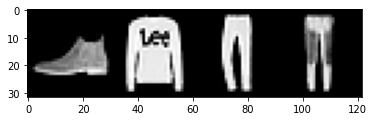

In [20]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

print(outputs)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [21]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000,
                                            shuffle=False)

In [22]:
output = net(iter(test_loader).next()[0])
lables = iter(test_loader).next()[1]

In [23]:
_, predicted = torch.max(output, 1)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


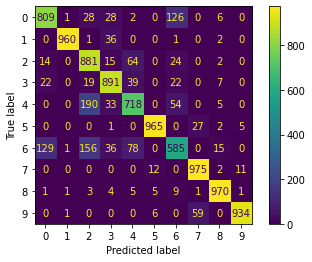

In [27]:
cm = confusion_matrix(lables.numpy(), predicted.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 
# cm = confusion_matrix(lables.numpy(), predicted.numpy(), labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=classes)
# disp.plot() 

In [28]:
accuracy_score(lables.numpy(), predicted.numpy())

0.8688